# Trabajo Practico Modulo 6

#### Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.


In [11]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import seaborn as sns
import tensorflow as tf

## Analisis de datos

In [12]:
#importar archivo
df = pd.read_csv('online_shoppers_intention.csv')
df[:10]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [13]:
# Muestra el número de filas, columnas y variables que hay en el dataset
print(u'- El número de filas en el dataset es: {}'.format(df.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(df.shape[1]))
print(u'- Los nombres de las variables independientes son: {}'.format(list(df.columns)))

- El número de filas en el dataset es: 12330
- El número de columnas en el dataset es: 18
- Los nombres de las variables independientes son: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


In [14]:
#Aqui se observa que debemos modificar algunos valores
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
# Divide los datos en subsets para el analisis y convertimos los valores categoricos en category asi facilita el analisis y target 
X_cat = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue', 'Month']
df[X_cat]=df[X_cat].astype('category')
X_num = df.select_dtypes(include=[np.float])
Y = df['Revenue']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12316 non-null  float64 
 1   Administrative_Duration  12316 non-null  float64 
 2   Informational            12316 non-null  float64 
 3   Informational_Duration   12316 non-null  float64 
 4   ProductRelated           12316 non-null  float64 
 5   ProductRelated_Duration  12316 non-null  float64 
 6   BounceRates              12316 non-null  float64 
 7   ExitRates                12316 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

C:\Users\GiuliaEl\AppData\Local\Temp/ipykernel_23020/2776682183.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_num = df.select_dtypes(include=[np.float])


## Procedemos a las representacion graficas

### Iniciamos con las variables numericas

In [16]:
#normalizamos las variables para la realizacion del analisis de violinplot
X_norm = (X_num-X_num.mean())/X_num.std()

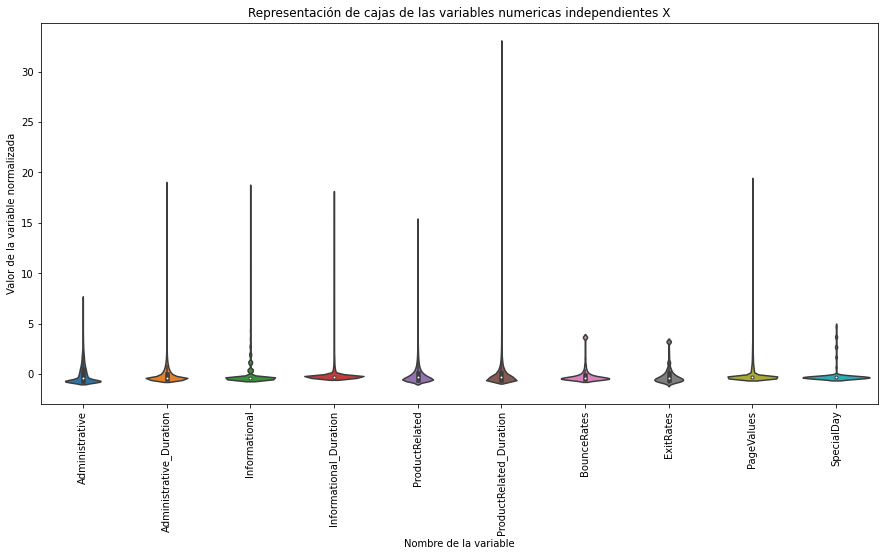

In [17]:
plt.figure(figsize=(15,7))
ax = sns.violinplot(data=X_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables numericas independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

Como podemos observar las variables contienen muchos outliners.
Asimismo se observa que potencialmente algunos de ellos podrian llevar una distribucion normal aunque la mayoria se observa que no

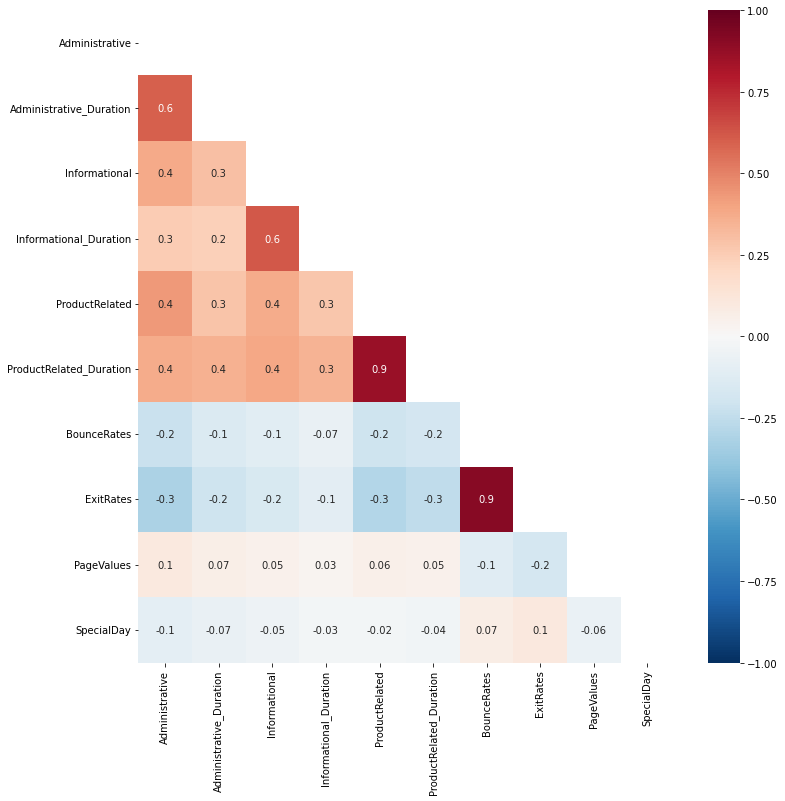

In [18]:
#Analizamos inicialmente la correlacion de los datos
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

En general se puede observar que hay muy poca corrlacion en nuestro data set
Los casos con mayor correlacion (como se habia observado anteriormente) son:
BounceRates & ExitRates (0.9).
ProductRelated & ProductRelated_Duration (0.9).

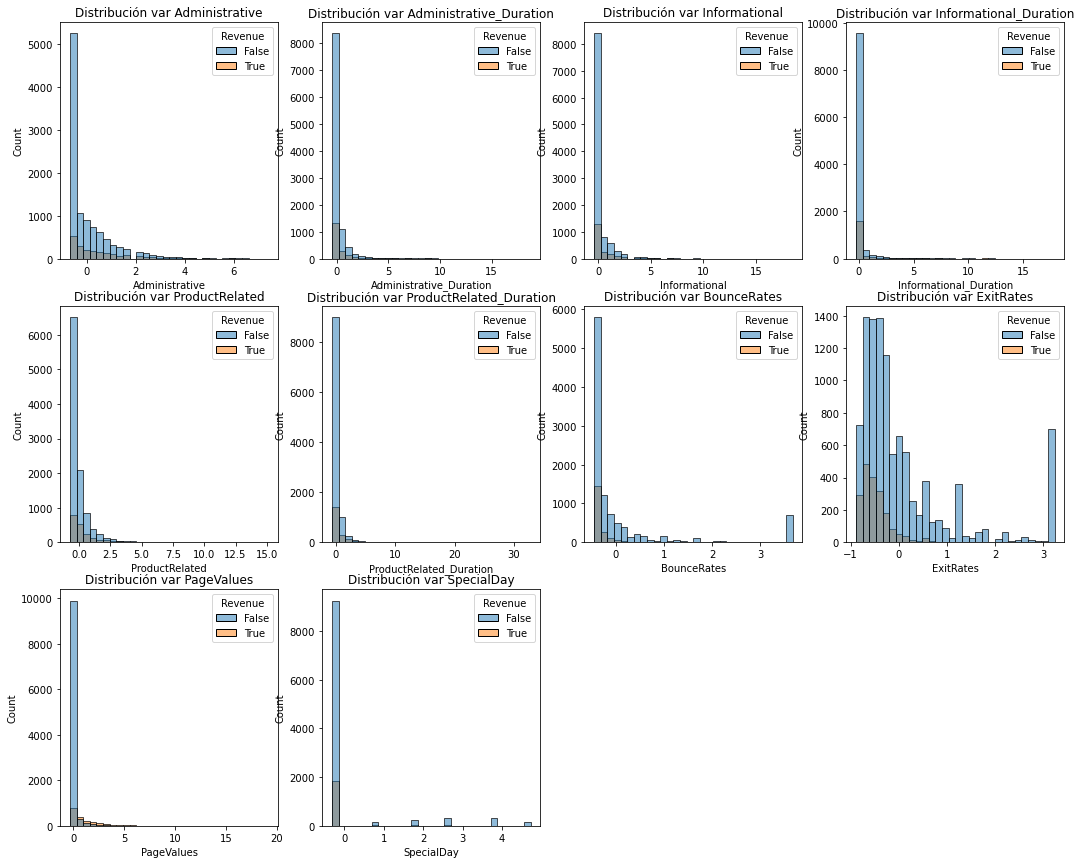

In [19]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X_norm.columns):
    n+=1
    plt.subplot(4, 4, n)
    sns.histplot(x=X_norm[column], hue=df["Revenue"], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

Las variables no siguen distribuciones normales o Gaussianas a pesar de la normalizacion (tradicionales, algunas de estas sin embargo podrian considerarse asimetricas como vemos en los histograma)
Otra conclusion que podemos sacara es que hay mas compras en o cerca a dias espciales
Asumismo notamos que a menos bounce rates y exit rates (que indican si el cliente a visitado otras paginas dentro del sitio), mayor cantidad de compras. Esto nos muestra tambien que el sitio tiene por lo general un buen "engagement"

### Procedemos a Analizar los datos categoricos

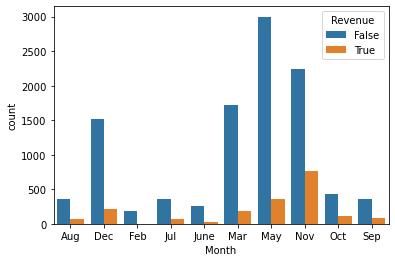

In [20]:
M = sns.countplot(x='Month', data=df, hue='Revenue')


Cuando analizamos la cantidad de falsos y verdaderos casos de la variable Revenue se Observa que hay claramente que en los meses donde hay mayor cantidad de festividades/ocaciones especiales (dia de la Mujer, dia de la Madre, Black Friday, Navidad, etc) es cuando hay mayor trafico. Por ende se entiende que un publico altamente estacional.

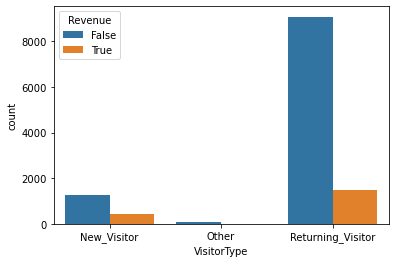

In [21]:
S = sns.countplot(x='VisitorType', data=df, hue='Revenue')

Observamos tambien que la mayor cantidad de compras se dan en clientes que han retornado. 

In [22]:
#Analizamos ahora los datos de la variable Weeend
pd.crosstab(df['Weekend'],df['Revenue'], margins=True)

Revenue,False,True,All
Weekend,,,
False,8053,1409,9462
True,2369,499,2868
All,10422,1908,12330


A primera vista se puede observar que las actividades durante el fin de semana, del total 1908 visitas que resultaron en revenue 26,15% suceden en el fin de semana y el 73,85% entre semana, lo que no implica una gran diferencia. Sin embargo si observamos el total de trafico se observa que de 9451 usuarios entre semana generaron 14,90% vs 2865 el fin de semana que generaron 17,41% de revenue.

## Procesamiento de datos

In [23]:
#Tratamiento de nulos
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [24]:
#eliminamos las lineas que tienen valores nullos ya que no representan una relevancia importante dentro las 12k lineas existentes.
df = df.dropna(axis=0)

In [25]:
#convertimos los datos booleanos en 1 y 0 para facilitar el analisis
bool_map={True:1,False:0}
df.Weekend.replace(bool_map,inplace=True)
df.Revenue.replace(bool_map,inplace=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


In [26]:
#Aplicamos hot encoding para numerizar las variables categoricas. Ya que multiples modelos necesitaran transformaciones correspondientes 
# creamos la instancia del labelencoder
le = preprocessing.LabelEncoder()
df_encoded = df.copy()
df_encoded['Month']= le.fit_transform(df_encoded['Month'])
df_encoded['VisitorType']= le.fit_transform(df_encoded['VisitorType'])
df_encoded['OperatingSystems']= le.fit_transform(df_encoded['OperatingSystems'])
df_encoded['Brownser']= le.fit_transform(df_encoded['Browser'])
df_encoded['Region']= le.fit_transform(df_encoded['Region'])
df_encoded['TrafficType']= le.fit_transform(df_encoded['TrafficType'])
df_encoded.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Brownser
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,0,1,0,0,2,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,1,2,0,1,2,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,3,1,8,2,2,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,2,2,1,3,2,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,2,3,0,3,2,1,0,2


In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12316 non-null  float64 
 1   Administrative_Duration  12316 non-null  float64 
 2   Informational            12316 non-null  float64 
 3   Informational_Duration   12316 non-null  float64 
 4   ProductRelated           12316 non-null  float64 
 5   ProductRelated_Duration  12316 non-null  float64 
 6   BounceRates              12316 non-null  float64 
 7   ExitRates                12316 non-null  float64 
 8   PageValues               12316 non-null  float64 
 9   SpecialDay               12316 non-null  float64 
 10  Month                    12316 non-null  int32   
 11  OperatingSystems         12316 non-null  int64   
 12  Browser                  12316 non-null  category
 13  Region                   12316 non-null  int64   
 14  Traffi

In [28]:
df_encoded['Browser'] = df_encoded['Browser'].astype('int')

In [29]:
#tratamos los outliners que habiamos identificado anteriormente. 
#EN el caso de las columnas con valores 0.00 como limites bajos y altos, no los ajustaremos.
X_num = df_encoded.select_dtypes(include=[float])
X_dum = pd.DataFrame(data=df_encoded)
for column in X[X_num]:
    if column != 'SpecialDay' or column != 'Informational' or column != 'Informational_Duration' or column != 'PageValues':
        q1 = X[column].quantile(0.25)
        q3 = X[column].quantile(0.75)
        iqr = q3-q1
        cut_off = iqr * 1.5
        lower, upper = q1 - cut_off, q3 + cut_off
        print(column, lower, upper) 
        newcolumn_name = column + '_iscl'
        if iqr >0:
            X[newcolumn_name] = np.where(X[column] < lower, X[column], lower)
        else:
            X[newcolumn_name] = np.where(X[column] > upper, X[column], upper)
    else:
        pass   


NameError: name 'X' is not defined

In [30]:
#separamos nuestras muestras entre las variables y nuestro target
y = X_dum['Revenue']
X = X_dum.drop(['Revenue'],axis=1)
               #,'Administrative', 'Administrative_Duration', 'Informational','ProductRelated','ProductRelated_Duration','ProductRelated_Duration','BounceRates','ExitRates','Informational_Duration', 'PageValues', 'SpecialDay'], axis=1)

In [31]:
#De esta manera nos quedan los datos
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Brownser
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,0,1,0,0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,1,2,0,1,2,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,3,1,8,2,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,2,2,1,3,2,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,2,3,0,3,2,1,2


In [32]:
#separamos la data en distintos subsets
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.3, random_state=101)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=101)

In [33]:
#Procedemos con escalar los valores como forma de estandardizacion para la realizacion de algunos de nuestros modelos
sc_X = StandardScaler()
Xsc_train = sc_X.fit_transform(X_train)
Xsc_val = sc_X.fit_transform(X_val)
Xsc_test = sc_X.fit_transform(X_test)

## Construccion del Modelo

### Modelo 1 Regresion Logistica

### Aplicamos el modelo por defecto

In [34]:
lrm = LogisticRegression()
lrm.fit(Xsc_train,y_train)
lrm_pred = lrm.predict(Xsc_val)

print('Resultados de la Regresion Logistica:')
print('Exactitud       : ', metrics.accuracy_score(y_val, lrm_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_pred))
print('Matrix de Confusion:\n ', confusion_matrix(y_val, lrm_pred))

Resultados de la Regresion Logistica:
Exactitud       :  0.8770979967514889
F1 Score        :  0.4805491990846682
Precision       :  0.7835820895522388
Recall          :  0.3465346534653465
Matrix de Confusion:
  [[1515   29]
 [ 198  105]]


El nivel de exactitud ya nos indica un buen resultado 87.7%. La precision, que se calcula dividiendo los verdaderos positivos con los valores que fueron parte de la prediccion positiva, nos indica en este caso un alto nivel de precision al 78%
Recall se calcula dividiento los verdaderos positivos con cualquier valor que tuvo que haberse predicho como positivo, para la obtencion de mejores resultados estos valores tienen que estar en balance, y el F1 score no demuestra que no sucede. 
El F1 score combina los valores de precision y recall en una metrica calculando la media armonica.

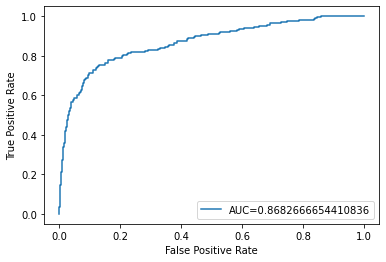

In [35]:
#Curva ROC: 
#definimos las metricas
y_lrm_proba = lrm.predict_proba(Xsc_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_lrm_proba)
auc_lrm = metrics.roc_auc_score(y_test, y_lrm_proba)

#creamos la curva agregando AUC
plt.plot(fpr,tpr,label="AUC="+str(auc_lrm))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Esta curva (receiver operating characteristic curve)  es un grafico que muestra el performance de un modelo de clasificacion en todos los umbrales de clasificacion.

Normalmente, cuanto la curva mas se acerque a la esquina izqueirda del plot, mejor clasifica los datos en categorias. Y como se observa en la curva, se nota que relativamente este modelo lo hace bien, sin embargo, esto se contradice cuando se obtiene el numero de AUC (cuando AUC=0.5, el clasificador no puede determinar correctamente entre positivos y negativos). Sin Embargo observamos aqui que nuestro AUC es de 86%, lo que no indica que es un clasificador bastate preciso

### Optimizamos parametros

Esto se realiza para intentar encontrar un mejor balance entre precision y recall (F1 score) 

In [112]:
#utilizamos GridSearch
lrm_param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']} 
lrm_grid = GridSearchCV(LogisticRegression(),
                        lrm_param_grid,
                        refit=True,
                        verbose=3,
                        scoring='roc_auc')

In [113]:
lrm_grid.fit(Xsc_train,y_train)
lrm_grid.best_params_
lrm_grid.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=0.01, solver=newton-cg;, score=0.868 total time=   0.0s
[CV 2/5] END ..........C=0.01, solver=newton-cg;, score=0.902 total time=   0.0s
[CV 3/5] END ..........C=0.01, solver=newton-cg;, score=0.894 total time=   0.0s
[CV 4/5] END ..........C=0.01, solver=newton-cg;, score=0.894 total time=   0.0s
[CV 5/5] END ..........C=0.01, solver=newton-cg;, score=0.865 total time=   0.0s
[CV 1/5] END ..............C=0.01, solver=lbfgs;, score=0.868 total time=   0.0s
[CV 2/5] END ..............C=0.01, solver=lbfgs;, score=0.902 total time=   0.0s
[CV 3/5] END ..............C=0.01, solver=lbfgs;, score=0.894 total time=   0.0s
[CV 4/5] END ..............C=0.01, solver=lbfgs;, score=0.894 total time=   0.0s
[CV 5/5] END ..............C=0.01, solver=lbfgs;, score=0.865 total time=   0.0s
[CV 1/5] END ................C=0.01, solver=sag;, score=0.868 total time=   0.0s
[CV 2/5] END ................C=0.01, solver=sag

C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5] END ................C=0.1, solver=saga;, score=0.866 total time=   0.1s
[CV 2/5] END ................C=0.1, solver=saga;, score=0.901 total time=   0.1s
[CV 3/5] END ................C=0.1, solver=saga;, score=0.891 total time=   0.0s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5] END ................C=0.1, solver=saga;, score=0.894 total time=   0.1s
[CV 5/5] END ................C=0.1, solver=saga;, score=0.865 total time=   0.0s
[CV 1/5] END .............C=1, solver=newton-cg;, score=0.866 total time=   0.0s
[CV 2/5] END .............C=1, solver=newton-cg;, score=0.900 total time=   0.0s
[CV 3/5] END .............C=1, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END .............C=1, solver=newton-cg;, score=0.893 total time=   0.0s
[CV 5/5] END .............C=1, solver=newton-cg;, score=0.865 total time=   0.0s
[CV 1/5] END .................C=1, solver=lbfgs;, score=0.866 total time=   0.0s
[CV 2/5] END .................C=1, solver=lbfgs;, score=0.900 total time=   0.0s
[CV 3/5] END .................C=1, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END .................C=1, solver=lbfgs;, score=0.893 total time=   0.0s
[CV 5/5] END .................C=1, solver=lbfgs;, score=0.865 total time=   0.0s
[CV 1/5] END ...............

C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5] END ...................C=1, solver=sag;, score=0.865 total time=   0.1s
[CV 1/5] END ..................C=1, solver=saga;, score=0.866 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5] END ..................C=1, solver=saga;, score=0.900 total time=   0.1s
[CV 3/5] END ..................C=1, solver=saga;, score=0.889 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5] END ..................C=1, solver=saga;, score=0.893 total time=   0.1s
[CV 5/5] END ..................C=1, solver=saga;, score=0.865 total time=   0.1s
[CV 1/5] END ............C=10, solver=newton-cg;, score=0.866 total time=   0.0s
[CV 2/5] END ............C=10, solver=newton-cg;, score=0.900 total time=   0.0s
[CV 3/5] END ............C=10, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END ............C=10, solver=newton-cg;, score=0.893 total time=   0.0s
[CV 5/5] END ............C=10, solver=newton-cg;, score=0.864 total time=   0.0s
[CV 1/5] END ................C=10, solver=lbfgs;, score=0.866 total time=   0.0s
[CV 2/5] END ................C=10, solver=lbfgs;, score=0.900 total time=   0.0s
[CV 3/5] END ................C=10, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END ................C=10, solver=lbfgs;, score=0.893 total time=   0.0s
[CV 5/5] END ................C=10, solver=lbfgs;, score=0.864 total time=   0.0s
[CV 1/5] END ...............

C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5] END ..................C=10, solver=sag;, score=0.864 total time=   0.1s
[CV 1/5] END .................C=10, solver=saga;, score=0.866 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5] END .................C=10, solver=saga;, score=0.900 total time=   0.1s
[CV 3/5] END .................C=10, solver=saga;, score=0.889 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5] END .................C=10, solver=saga;, score=0.893 total time=   0.1s
[CV 5/5] END .................C=10, solver=saga;, score=0.864 total time=   0.1s
[CV 1/5] END ...........C=100, solver=newton-cg;, score=0.866 total time=   0.0s
[CV 2/5] END ...........C=100, solver=newton-cg;, score=0.900 total time=   0.0s
[CV 3/5] END ...........C=100, solver=newton-cg;, score=0.889 total time=   0.0s
[CV 4/5] END ...........C=100, solver=newton-cg;, score=0.893 total time=   0.0s
[CV 5/5] END ...........C=100, solver=newton-cg;, score=0.864 total time=   0.0s
[CV 1/5] END ...............C=100, solver=lbfgs;, score=0.866 total time=   0.0s
[CV 2/5] END ...............C=100, solver=lbfgs;, score=0.900 total time=   0.0s
[CV 3/5] END ...............C=100, solver=lbfgs;, score=0.889 total time=   0.0s
[CV 4/5] END ...............C=100, solver=lbfgs;, score=0.893 total time=   0.0s
[CV 5/5] END ...............C=100, solver=lbfgs;, score=0.864 total time=   0.0s
[CV 1/5] END ...............

C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5] END .................C=100, solver=sag;, score=0.864 total time=   0.0s
[CV 1/5] END ................C=100, solver=saga;, score=0.866 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5] END ................C=100, solver=saga;, score=0.900 total time=   0.1s
[CV 3/5] END ................C=100, solver=saga;, score=0.889 total time=   0.1s


C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\GiuliaEl\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5] END ................C=100, solver=saga;, score=0.893 total time=   0.1s
[CV 5/5] END ................C=100, solver=saga;, score=0.864 total time=   0.1s


LogisticRegression(C=0.01, solver='saga')

In [114]:
lrm_grid = LogisticRegression()
lrm_grid.fit(Xsc_train,y_train)
lrm_grid_pred = lrm_grid.predict(Xsc_val)

print('Resultados de la Regresion Logistica Optimizada:')
print('Exactitud       : ', metrics.accuracy_score(y_val, lrm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, lrm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, lrm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, lrm_grid_pred))
print('Matrix de Confusion:\n ', confusion_matrix(y_val, lrm_grid_pred))

Resultados de la Regresion Logistica Optimizada:
Exactitud       :  0.8770979967514889
F1 Score        :  0.4805491990846682
Precision       :  0.7835820895522388
Recall          :  0.3465346534653465
Matrix de Confusion:
  [[1515   29]
 [ 198  105]]


Nuestros valores no han mejorado  con la optimizacion

## Modelo 2: Random Forest
Este modelo opera construyendo muchos arboles de decision en el entrenamiento. Lo mas positivo de este modelo es que permite la utilizacion de distintias variables continuas, otorgando en general mejores resultados en problemas de clasificacion

### Aplicamos el modelo por defecto

In [115]:
rfm = RandomForestClassifier()
rfm.fit(Xsc_train,y_train)
rfm_pred = rfm.predict(Xsc_val)

print('Resultados del Random Forest:')
print('Exactitud          : ', metrics.accuracy_score(y_val, rfm_pred))
print('F1 Score           : ', metrics.f1_score(y_val, rfm_pred))
print('Precision          : ', metrics.precision_score(y_val, rfm_pred))
print('Recall             : ', metrics.recall_score(y_val, rfm_pred))
print('Matrix de confusion:\n ', confusion_matrix(y_val, rfm_pred))

Resultados del Random Forest:
Exactitud          :  0.8900920411478073
F1 Score           :  0.6205607476635514
Precision          :  0.7155172413793104
Recall             :  0.5478547854785478
Matrix de confusion:
  [[1478   66]
 [ 137  166]]


El modelo ha mejorado significamente en comparacion a la regresion logistica, nuestro F1 score ha incrementado de un 48% a 62% (con parametros en defecto), asimismo, la exactitud ha llegado a un 89%. En comparacion el recall es mucho mas alto en este modelo. Posteriormente revisaremos con la optimizacion si estos valores mejoran. 

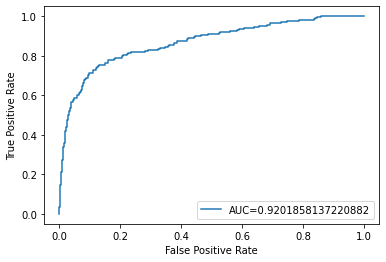

In [117]:
#Curva ROC
#definimos las metricas
y_pred_rfm = rfm.predict_proba(Xsc_test)[::,1]
frf, trf, _ = metrics.roc_curve(y_test,  y_pred_rfm)
auc_rfm = metrics.roc_auc_score(y_test, y_pred_rfm)

#creamos la curva agregando AUC
plt.plot(fpr,tpr,label="AUC="+str(auc_rfm))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Observamos que nuestros valores AUC tambien han mejorado significativamente en comparacion a la regresion logistica. de un 86% a un 92%.

### Optimizamos parametros

In [118]:
#utilizamos GridSearch
rfm_param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
rfm_grid = GridSearchCV(RandomForestClassifier(),
                        rfm_param_grid)

In [119]:
rfm_grid.fit(Xsc_train,y_train)
rfm_grid.best_params_
rfm_grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [120]:
rfm_grid = RandomForestClassifier()
rfm_grid.fit(Xsc_train,y_train)
rfm_grid_pred = lrm_grid.predict(Xsc_val)

print('Resultados de la Regresion Logistica Optimizada:')
print('Exactitud       : ', metrics.accuracy_score(y_val, rfm_grid_pred))
print('F1 Score        : ', metrics.f1_score(y_val, rfm_grid_pred))
print('Precision       : ', metrics.precision_score(y_val, rfm_grid_pred))
print('Recall          : ', metrics.recall_score(y_val, rfm_grid_pred))
print('Matrix de Confusion:\n ', confusion_matrix(y_val, rfm_grid_pred))

Resultados de la Regresion Logistica Optimizada:
Exactitud       :  0.8770979967514889
F1 Score        :  0.4805491990846682
Precision       :  0.7835820895522388
Recall          :  0.3465346534653465
Matrix de Confusion:
  [[1515   29]
 [ 198  105]]


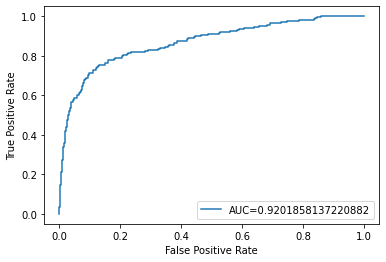

In [123]:
#Curva ROC
#definimos las metricas
rfm_grid_pred = rfm.predict_proba(Xsc_test)[::,1]
grf, grf, _ = metrics.roc_curve(y_test,  rfm_grid_pred)
auc_grid_rfm = metrics.roc_auc_score(y_test, rfm_grid_pred)

#creamos la curva agregando AUC
plt.plot(fpr,tpr,label="AUC="+str(auc_grid_rfm))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

la curvatura ha mejorado de la misma manera, aunque no han habido cambios en el valor AUC

## Modelo 3: Red Neural

### Artificial Neural Network

Una ANN esta basada en una colleccion de unidades conectadas o nodos llamados neuronas artificiales, que modela las neuronas del cerebro biologico

In [56]:
#Vamos a crear nuestro objeto ANN usando una clase de KERAS llamada Sequential.
ann = tf.keras.models.Sequential()

In [57]:
#Agregamos nuestra primera capa
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [58]:
#Agregamos una segunda capa oculta
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [59]:
#creamos una capa de salida
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [69]:
#Compilamos ANN para obtener nuestro nivel de exactitud
ann.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['Accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
            

In [70]:
#Fitting de ANN
ann.fit(Xsc_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 0.2411 - Accuracy: 0.9109 - precision_4: 0.7823 - recall_1: 0.5843 - auc_1: 0.9114
Epoch 2/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2384 - Accuracy: 0.9099 - precision_4: 0.7741 - recall_1: 0.5858 - auc_1: 0.9134
Epoch 3/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2377 - Accuracy: 0.9099 - precision_4: 0.7843 - recall_1: 0.5723 - auc_1: 0.9139
Epoch 4/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2368 - Accuracy: 0.9091 - precision_4: 0.7742 - recall_1: 0.5783 - auc_1: 0.9151
Epoch 5/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2361 - Accuracy: 0.9095 - precision_4: 0.7724 - recall_1: 0.5851 - auc_1: 0.9150
Epoch 6/100
270/270 [==============================] - 0s 1ms/step - loss: 0.2361 - Accuracy: 0.9094 - precision_4: 0.7771 - recall_1: 0.5776 - auc_1: 0.9146
Epoch 7/100
270/270 [==============================]

Resultados del ANN:
Exactitud       :  0.9113
F1 Score        :  -
Precision       :  0.7887
Recall          :  0.5791

Adicionalmente calculamos AUC: 0.9227

Como se puede observar, nuestro nivel de exactitud mejoro a un 90%, 1% de mejora en relacion al random forest, aunque los niveles de precision se han mas o menos mantenidos, se muestra que el AUC es la mas alta obtenida hasta ahora sin tener que optimizar parametros. 

De todas los 3 modelos, el modelo que reuslta mas effectivo a simple vista es el ANN, dentro de las ventajas: 
- tiene la habilidad de trabajar con poco conocimiento
- ANN aprende de eventos y toma decision comentando en eventos similares.
- Alta calidad y exactityd en los outputs.
Sin embargo una de las desventajas es que la red es dificil de determinar. 